In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "D:\Deep Learning\Fire Guard\Dataset\Train"
training_datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.15,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "D:\Deep Learning\Fire Guard\Dataset\Valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(224,224),
                                                       shuffle = True,
                                                       class_mode='categorical',
                                                       batch_size = 128)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              shuffle = True,
                                                              batch_size= 14)

Found 38659 images belonging to 2 classes.
Found 9666 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

87916544/87910968 [==============================] - 20s 0us/step
Epoch 1/20
14/14 [==============================] - 114s 8s/step - loss: 4.9917 - acc: 0.7388 - val_loss: 0.3622 - val_acc: 0.8622
Epoch 2/20
14/14 [==============================] - 106s 8s/step - loss: 0.2708 - acc: 0.9146 - val_loss: 0.0441 - val_acc: 0.9949
Epoch 3/20
14/14 [==============================] - 106s 8s/step - loss: 0.1259 - acc: 0.9526 - val_loss: 0.2938 - val_acc: 0.8724
Epoch 4/20
14/14 [==============================] - 110s 8s/step - loss: 0.2638 - acc: 0.9347 - val_loss: 0.0196 - val_acc: 0.9847
Epoch 5/20
14/14 [==============================] - 104s 7s/step - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0268 - val_acc: 0.9898
Epoch 6/20
14/14 [==============================] - 104s 7s/step - loss: 0.1188 - acc: 0.9671 - val_loss: 0.0083 - val_acc: 0.9949
Epoch 7/20
14/14 [==============================] - 108s 8s/step - loss: 0.1855 - acc: 0.9609 - val_loss: 0.3032 - val_acc: 0.9031
Epoch 8/20
14/14 

In [3]:
#To train the top 2 inception blocks, freeze the first 249 layers and unfreeze the rest.
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True
    
#Recompile the model for these modifications to take effect
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 10,
validation_data = validation_generator,
validation_steps = 14)

Epoch 1/10
14/14 [==============================] - 117s 8s/step - loss: 0.0668 - acc: 0.9860 - val_loss: 0.0165 - val_acc: 0.9949
Epoch 2/10
14/14 [==============================] - 116s 8s/step - loss: 0.0426 - acc: 0.9933 - val_loss: 4.5736e-04 - val_acc: 1.0000
Epoch 3/10
14/14 [==============================] - 118s 8s/step - loss: 0.0251 - acc: 0.9961 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 4/10
14/14 [==============================] - 123s 9s/step - loss: 0.0265 - acc: 0.9955 - val_loss: 1.4548e-04 - val_acc: 1.0000
Epoch 5/10
14/14 [==============================] - 122s 9s/step - loss: 0.0193 - acc: 0.9978 - val_loss: 4.9043e-04 - val_acc: 1.0000
Epoch 6/10
14/14 [==============================] - 122s 9s/step - loss: 0.0152 - acc: 0.9983 - val_loss: 4.8630e-04 - val_acc: 1.0000
Epoch 7/10
14/14 [==============================] - 121s 9s/step - loss: 0.0176 - acc: 0.9967 - val_loss: 4.0172e-04 - val_acc: 1.0000
Epoch 8/10
14/14 [==============================] - 125s 9s/ste

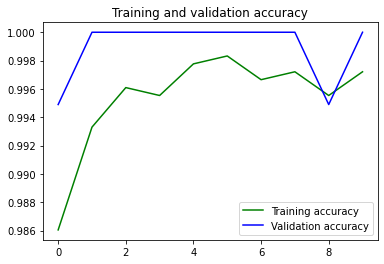

<Figure size 432x288 with 0 Axes>

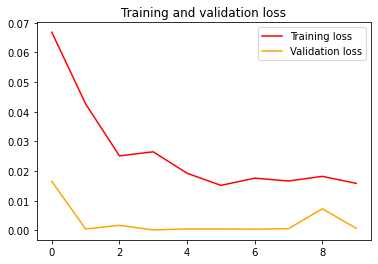

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [14]:
#predicting any random image
import numpy as np
###from google.colab import files
from keras.preprocessing import image

###uploaded = files.upload()
###for fn in uploaded.keys():
  
path = 'D:\\Deep Learning\\Fire Guard\\Dataset\\Kaggle-Fire-Detection\\99.jpg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
print(np.argmax(classes[0])==0, max(classes[0]))

True 0.6987745


In [16]:
model.save('D:\Deep Learning\Fire Guard\Trained Models\InceptionV3.h5')